<a href="https://colab.research.google.com/github/Rosss14/cell_detection_project/blob/main/tfg_zavoiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importacion de librerias y descarga de imagenes

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import pathlib

tf.get_logger().setLevel('ERROR')

# GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

def download_images():
  base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/'
  filenames = ['image1.jpg', 'image2.jpg', 'image3.jpg']
  image_paths = []
  for filename in filenames:
    image_path = tf.keras.utils.get_file(fname = filename, origin = base_url + filename, untar = False)
    image_path = pathlib.Path(image_path)
    image_paths.append(str(image_path))
  return image_paths

IMAGE_PATHS = download_images()

786432/772080 [==============================] - 0s 0us/step


A continuacion, se define un metodo para la carga de imagenes desde el ordenador

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_photo2.jpg to test_photo2.jpg
Saving test_photo1.jpg to test_photo1.jpg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images = []
for item in uploaded:
  images.append(item)

# Descomentar la siguente linea para utilizar las imagenes subidas desde el ordenador
IMAGE_PATHS = images

Descarga del modelo

In [ ]:
def download_model(model_name, model_date):
  base_url = 'http://download.tensorflow.org/models/object_detection/tf2/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(fname=model_name, 
                                      origin = base_url+model_date+'/'+model_file,
                                      untar = True)
  return str(model_dir)

MODEL_DATE = '20200713'
MODEL_NAME = 'centernet_hg104_1024x1024_coco17_tpu-32'
MODEL_DIR = download_model(MODEL_NAME, MODEL_DATE)

1424441344/1424430731 [==============================] - 24s 0us/step


Descarga de etiquetas

In [ ]:
def download_labels(filename):
  base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
  label_dir = tf.keras.utils.get_file(fname = filename,
                                      origin = base_url + filename,
                                      untar = False)
  label_dir = pathlib.Path(label_dir)
  return str(label_dir)

LABEL_FILENAME = 'mscoco_label_map.pbtxt'
LABEL_DIR = download_labels(LABEL_FILENAME)

16384/5056 [=================================================================================================] - 0s 0us/step


## Configuracion del entorno
 Para usar herramientas de deteccion de objetos, es necesaria una configuracion del entorno

In [ ]:
# Clonar el repositorio git de los modelos de tensorflow
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3421, done.
remote: Counting objects: 100% (3421/3421), done.
remote: Compressing objects: 100% (2854/2854), done.
remote: Total 3421 (delta 892), reused 1409 (delta 510), pack-reused 0
Receiving objects: 100% (3421/3421), 35.13 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (892/892), done.


Instalar la API de deteccion de objetos

In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694828 sha256=88adc785ac0eaf2045c3ee9a1723b339ecf496ef3b3a8a26ef4c503ad74a36de
  Stored in directory: /tmp/pip-ephem-wheel-cache-6qt1w6lk/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=3c8e025e240b1fab3e155c874cb2be282ba25caba4ebf8018ff883e8233bd3f2
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/0



  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.13 requires dill>=0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.

## Carga del modelo 
Se carga el modelo descargado antes

In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

MODEL_PATH = MODEL_DIR + '/saved_model'
start_time = time.time()

# Cargar el modelo y construir la funcion de deteccion
detect_fn = tf.saved_model.load(MODEL_PATH)

end_time = time.time()
elapsed_time = end_time - start_time
print('Terminado, tiempo = {} segundos'.format(elapsed_time))

Terminado, tiempo = 64.68154835700989 segundos


## Carga de las etiquetas

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(LABEL_DIR, 
                                                                    use_display_name=True)

## Compilacion

Ejecutando la inferencia para test_photo2.jpg , deteccion de 100 objetos terminado
Ejecutando la inferencia para test_photo1.jpg , deteccion de 100 objetos terminado


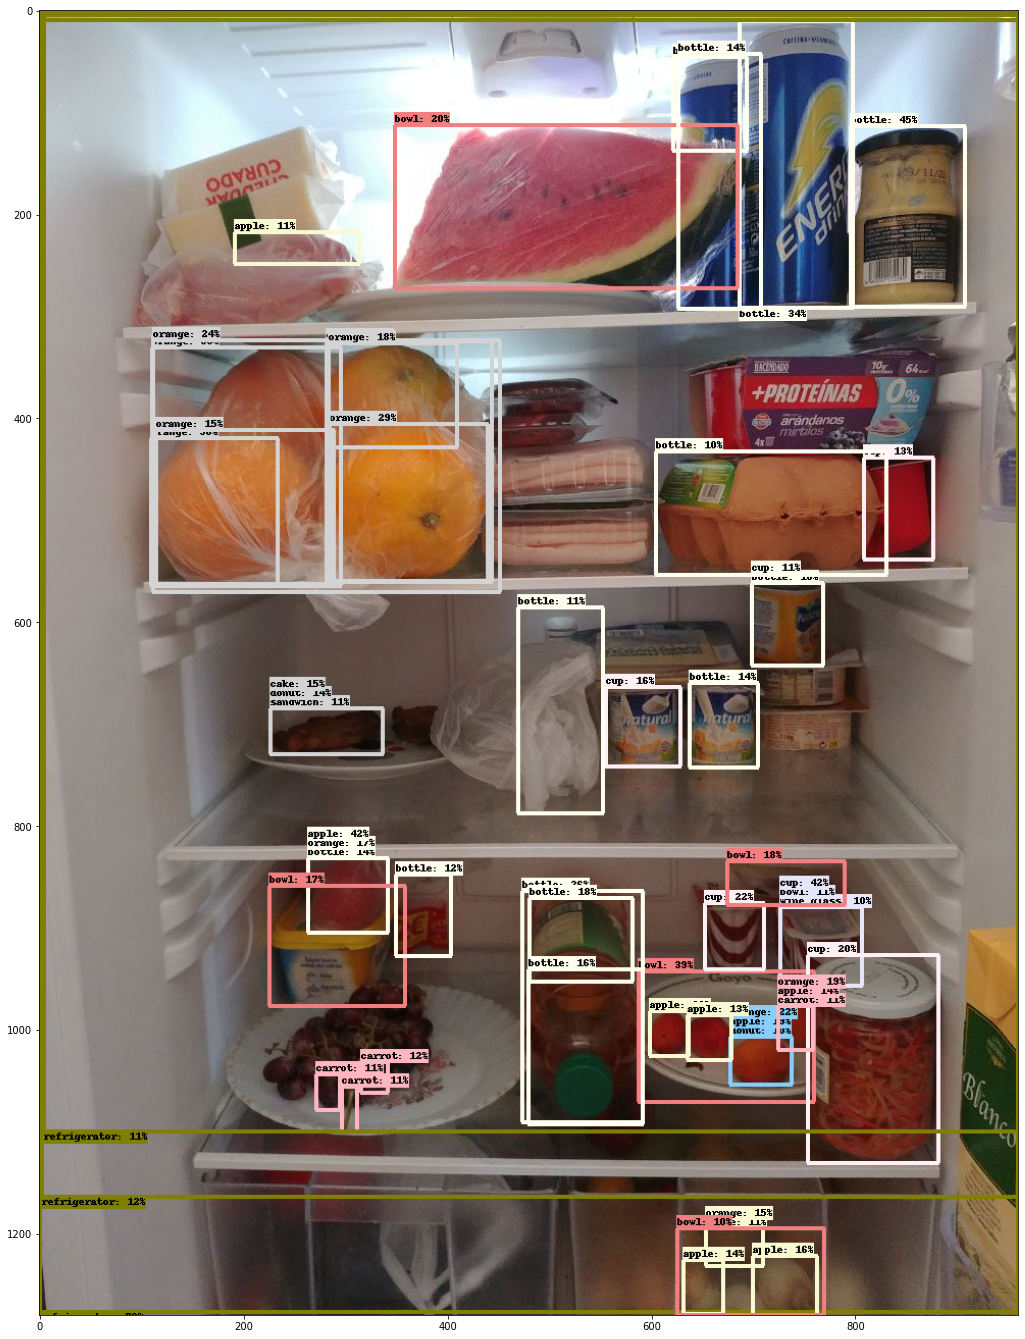

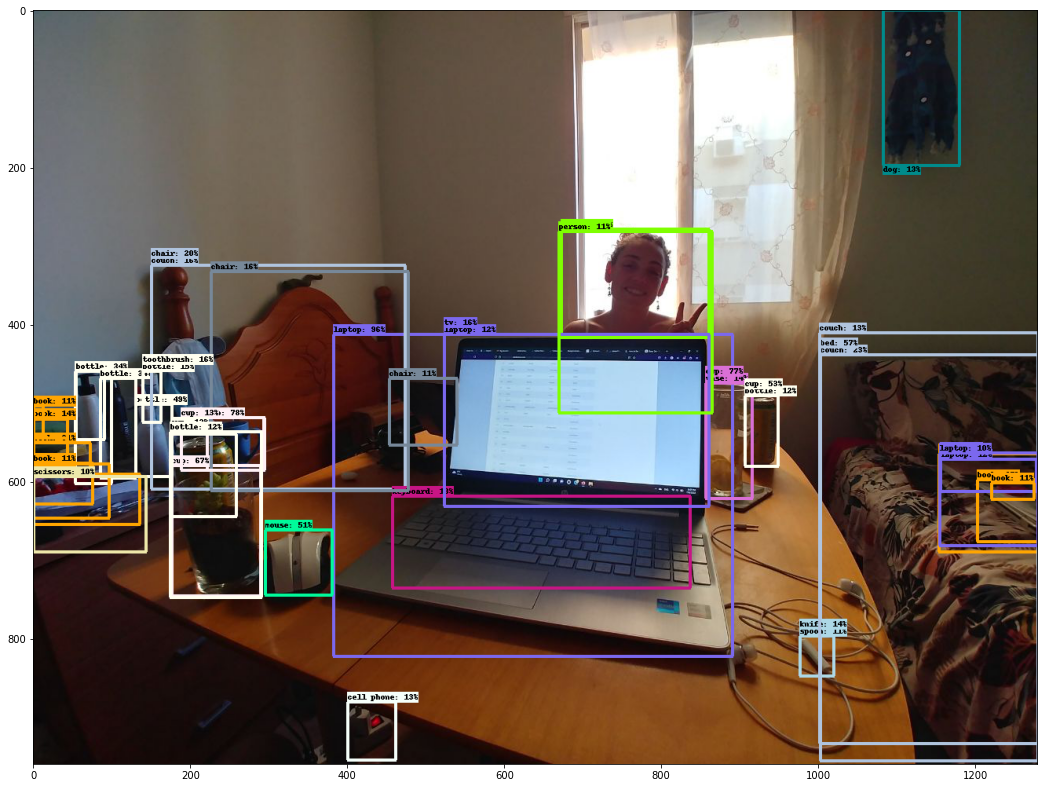

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def load_image_into_numpy_array(path):
  ## Devuelve la imagen en un array de numpy
  return np.array(Image.open(path))

i=1
for image_path in IMAGE_PATHS:

  print('Ejecutando la inferencia para {}'.format(image_path), end=' ')

  image_np = load_image_into_numpy_array(image_path)

  # Giro horizontal
  # image_np = np.fliplr(image_np).copy()

  # Conversion a niveles de gris
  # image_np = np.tile(np.mean(image_np, 2, keepdims=True), (1,1,3)).astype(np.uint8)

  # La conversion del array a tensor
  input_tensor = tf.convert_to_tensor(image_np)
  # El modelo espera un lote de imagenes, por lo que añadimos un axis
  input_tensor = input_tensor[tf.newaxis, ...]

  detections = detect_fn(input_tensor)

  # Todas las salidas son lotes tensor
  # Convertir a arrays numpy y sacar indice [0] para quitar la dimension de lote
  # Solo interesan los primeros num_detections
  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes to int
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates = True,
      max_boxes_to_draw = 200,
      min_score_thresh = .10,
      agnostic_mode = False)
  
  # Descarga de la imagen
  image_to_save = Image.fromarray(image_np_with_detections)
  image_file = 'detected' + str(i) + '.jpg'
  # image_to_save.save(image_file)
  i += 1
  
  plt.figure(figsize=(18, 24))
  plt.imshow(image_np_with_detections)
  print(', deteccion de {} objetos'.format(len(detections['detection_classes'])), end=' ')
  print('terminado')



plt.show()

In [ ]:
i = 0
while i<10:
  det_class = detections['detection_classes'][i]
  print(category_index[det_class]['name'], end=' ')
  print(detections['detection_boxes'][i], end =' ')
  print(detections['detection_scores'][i])
  i+=1

print('Printed {} rows'.format(i))

laptop [0.43058652 0.29858047 0.8566675  0.6968123 ] 0.9584476
cup [0.54120135 0.17323253 0.609513   0.23013216] 0.7803316
cup [0.49516508 0.6690496  0.64736474 0.71575296] 0.76526064
cup [0.6041719  0.13815057 0.7767384  0.22732225] 0.6738833
bed [0.45737815 0.7834457  0.9951305  1.        ] 0.5688851
person [0.29152673 0.5254817  0.43362808 0.6730418 ] 0.5446698
cup [0.512125   0.70800585 0.60490006 0.7415357 ] 0.5335757
mouse [0.6903466  0.23081098 0.7753829  0.29766142] 0.5117702
bottle [0.5233088  0.10157911 0.61831486 0.13871934] 0.49416098
bottle [0.47991726 0.04165612 0.62810314 0.07827668] 0.4072359
Printed 10 rows


In [ ]:
train_image_dir = 'models/research/object_detection/test_images/ducky/train/'
train_images_np = []
for i in range(1,6):
  image_path = os.path.join(train_image_dir, 'robertducky' + str(i) + '.jpg')
  train_images_np.append(load_image_into_numpy_array(image_path))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

for idx, train_image_np in enumerate(train_images_np):
  plt.subplot(2, 3, idx+1)
  plt.imshow(train_image_np)
plt.show()


NameError: ignored

In [ ]:
from object_detection_utils import colab_utils

gt_boxes[]
colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)
